# TensorFlow 살펴보기 - Linear Regression

## 1. 시작하기

TensorFlow를 시작할 때 가장 먼저 다뤄보는 예제는 아마도 Linear Regression일 것이다. 
Regression모델을 살펴보고, 어떤 데이터에 적합한 모델인지 알아보자. 

**TODO list**
- 문제정의
- 데이터셋 준비
- 모델 구현
- Tensorflow Session을 통한 실험
- 결과 확인

**prerequisite**
- Tensorflow v1.2

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## 2. 문제정의

Regression은 독립 변수 (independant variables) $x$와 종속 변수 (dependant variable)인 $y$의 관계를 잘 표현하는 모델을 찾는 문제이다. 여기서 독립변수와 종속변수의 상황에 따라 simple regression, multiple regression, multi-variate regression으로 나뉜다. 하나씩 살펴보도록 하자. 

- **simple regression**: **하나**의 독립변수 $x$, **하나**의 종속변수 $y$ 인 경우. $y=f(x)$
- **multiple regression**: **여러개**의 독립변수 $x$, **하나**의 종속변수 $y$인 경우. $y=f(x_1, x_2, ..., x_p)$
- **multivariate regression**: **하나**의 독립변수 $x$, **여러개**의 종속변수 $y$인 경우. $y_1, y_2, ..., y_m = f(x)$
- **multiple multivariate regression**: **여러개**의 독립변수 $x$, **여러개**의 종속변수 $y$인 경우. $y_1, y_2, ..., y_m = f(x_1, x_2, ..., x_p)$ 

벡터로 표현되는 하나 이상의 독립 변수 (independant variables) $X$와 스칼라로 표현되는 종속 변수 (dependant variable)인 $y$와의 상관 관계를 선형 표현으로 모델링하고자 한다. 이때 앞서 설명한 바와 같이, multiple regression을 일반화시켜서 보자. 주어진 데이터는 $n$개의 샘플을 가지며, 각 샘플은 다음과 같이 종속 변수 $y_i$와 $p$개의 독립변수 $x_{ip}$로 구성된다. 각 샘플들의 구성인 데이터셋 (dataset)은 $\{y_i, x_{i1}, x_{i2}, ..., x_{ip}\}^{n}_{i=1}$으로 표현된다. 결국 linear regression은 독립 변수의 변화에 따라 종속 변수를 선형적인 표현하는 것이다. 독립변수와 종속변수의 관계는 선형 관계식을 이용하여 표현한다. 
그리고 이 모델의 결과라고 생각할 수 있는 **종속변수는 연속적인 값 (continuous value)**이라는 사실은 꼭 기억해야 한다. 

## 3. 데이터셋 준비

여기서는 독립 변수 x가 1차원 (스칼라)이고, 종속 변수 y도 1차원 (스칼라)인 데이터셋 $\{y_i, x_{i}\}^{n}_{i=1}$에 대해 simple linear regression을 적용해보도록 하자. 일단 데이터를 준비해보자. 간단한 예제니까 list로 아래와 같이 만들어보도록 한다. 

```python
x1_data = [1, 2, 3]
y_data = [1.1, 1.9, 3.2]
```

위와 같이 간단한 데이터셋 $\{y_i, x_{i1}\}^{n=3}_{i=1}$이 만들어졌다. 이 데이터셋은 이후 TensorFlow의 placeholder를 이용하여 feeding하기로 한다. 

## 4. 모델 정의: Linear Regression
모델을 만들기 위해서는 앞으로 아래와 같이 3단계로 나눠서 진행한다.

1. **모델**에 대한 이론적인 이해
1. **모델**을 **그래프**로 표현하기
1. 표현된 **그래프**를 **TensorFlow**로 작성하기


### 4.1. Linear Regression model

이제 만들어진 데이터셋에 대해 선형 상관 관계를 모델링하기 위해 선형 회귀 모델 (linear regression model)을 아래와 같이 정의해보자. 
일반화된 종속 변수 $y_i$와 $p$개의 독립변수 $x_{ip}$에 대한 선형 회귀 모델은 아래와 다음과 같다. 

$y_i = w_{1}x_{i1} + w_{2}x_{i2} + \cdots  + w_{p}x_{i1} + b_{i} = WX + b, i=1,\cdots ,n$ 

$b$는 관측되지 않은 확률 변수이다. 여기선 독립 변수 $x_1$에 대해서만 고려하므로, 모델은 아래와 같이 단순해진다. 

$y_i = w_{1}x_{i1} + b = WX + b, i=1,\cdots ,n$ 

이제 선형 회귀 모델을 통해 가설(hypothesis)을 세울수 있다.  

${hypothesis}_{w,b} = w_{1}x_{i1} + b = WX + b, i=1,\cdots ,n$ 

### 4.2. Graph representation (linear regression model)

앞서 세운 가설(hypothesis)을 그래프로 표현해보면 아래와 같이 나타낼 수 있다.

- <span style="background-color:#99ffff">데이터셋</span>: **x1, y**
- <span style="background-color:#ccffcc">모델(변수)</span>: **w, b, hypothesis**
- <span style="background-color:#ffcc99">모델(연산)</span>: **MUL (multiplication), ADD (addition)**

(연산을 표현하는 약어는 임의로 지정하였습니다. 좋은 의견있으면 환영!)


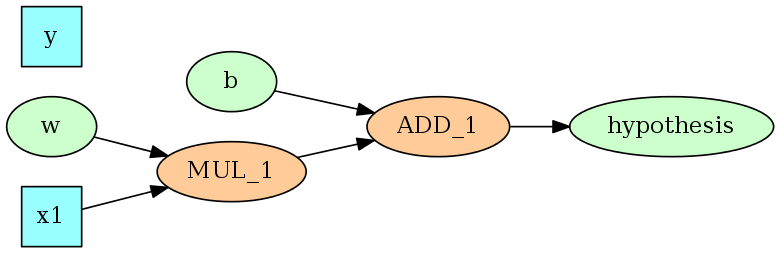

In [22]:
import networkx as nx
from nxpd import draw, nxpdParams
nxpdParams['show'] = 'ipynb'

G = nx.DiGraph()
G.graph['rankdir'] = 'LR'
G.graph['dpi'] = 120

G.add_node('x1', shape='square', style='filled', fillcolor='#99ffff')
G.add_node('y', shape='square', style='filled', fillcolor='#99ffff')
G.add_node('w', style='filled', fillcolor='#ccffcc')
G.add_node('b', style='filled', fillcolor='#ccffcc')
G.add_node('hypothesis', style='filled', fillcolor='#ccffcc')
G.add_node('MUL_1', style='filled', fillcolor='#ffcc99')
G.add_node('ADD_1', style='filled', fillcolor='#ffcc99')
G.add_edge('x1','MUL_1')
G.add_edge('w','MUL_1')
G.add_edge('MUL_1','ADD_1')
G.add_edge('b','ADD_1')
G.add_edge('ADD_1','hypothesis')
draw(G)

### 4.3. Tensorflow Implementation (linear regression model)
```python
# 데이터셋 (tf.placeholder를 이용해 type만 지정해주고, 값은 계속 바뀔수 있도록 한다.)
x1 = tf.placeholder(tf.float32, name='x1')
y = tf.placeholder(tf.float32, name='y')

# 모델 (tf.Variable을 이용해 값이 바뀔수 있도록 한다. 여기선 tf.random_uniform을 이용해 초기화)
w = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='w')
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='b')

# 가설은 linear regression model을 표현. y = w * x + b
# w 와 x 가 행렬이 아니므로 tf.matmul 이 아니라 기본 곱셈 기호를 사용했습니다. (by golbin)
hypothesis = x1 * w + b
```

> **Q) tf.Graph라는 것이 있는데 여기서는 한번도 나온적이 없다. 그래프를 제대로 만든것일까?**

> A) 그래프를 전혀 정의하지 않아도, 사용된 모든 변수들은 default_graph에 정의된다. 


> **Q) 모델에 사용되는 Variable을 만들면서 초기화를 수행했다. 초기화 방법에서 사용된 인자들의 의미와 사용시 유의해야 할 점은 무엇일까?**

> A) shape과 초기화범위 

> **Q) 위에서 hypothesis는 그냥 선언에서 쓰고 있다. 뭘로 만들어진걸까? 어떻게 확인할 수 있을까?**

> A) 자동으로 tf.Variable로 만들어지고 name은 자동생성된다. print(hypotesis)를 통해 type 확인.

> **Q) hypothesis에서 WX와 XW의 차이는 무엇일까?**

> A) 



### 4.4. Objective function and optimizer

그리고 가설이 실제 데이터와 얼마나 유사한지를 평가해야 한다. 그것을 손실 함수 (loss function 혹은 objective function)으로 정의한다. 
- 관측된 $n$개의 데이터 샘플인 $x_{i1}, y_i$이 있다.
- 이를 위해 $w, b$로 표현되는 선형 회귀 모델이 위와 같이 정의하였다.
- 이때, 회귀 모델이 독립변수 $x_i$를 통해 예측한 $\hat{y_i}={ hypothesis }_{ w,b }({ x }_{ i })$과 데이터 샘플의 $y_i$이 유사하도록 해야한다.

이를 평가하기 위한 손실함수 $J(w,b)$는 mean square error (mse)를 이용해 다음과 같이 정의할 수 있다. 
- $J(w,b) = \frac { 1 }{ n } \sum _{ i=1 }^{ n }{ { \left( \hat{ y_i}-{ y }_{ i } \right)  }^{ 2 } } $

결국 손실함수 $J(w,b)$를 최소화 시키는 $w$와 $b$를 찾는것이 데이터셋에서 가장 상관관계가 높은 선형 회귀 모델을 찾는 것이 되겠다. 

손실 함수 $J(w,b)$를 ```cost```로 정의하고, 손실함수를 최적화시키는 ```optimizer```를 그래프에 추가해서 표현해보도록 하자.

> **Q) MSE 외의 손실함수에 대해 종류를 알아보고 수식으로 표현해보자. L1, L2 norm에 대해서 알아보자.**

> A) 무수히 많음. Appendix에 따로 cost function을 종류별로 정리 (TODO)

> **Q) Optimizer는 따로 공부하기에 너무 많으니까 나중에 따로 설명하기로 하자. 일단 여기서 사용된 learning rate가 무엇을 의미하는지 알아보자.**

> A) general optimizer에서 lr_rate 설명 (TODO)

> **Q) 손실함수를 통해 계산된 오차가 모델에 반영되는 과정은 어떻게 수행되는가?**

> A) Automatic differentiation 설명

### 4.5. Graph Representation (Objective function and optimizer)

앞서 작성한 그래프에서 손실함수와 최적화 연산을 추가해보자.

- <span style="background-color:#99ffff">데이터셋</span>: x1, y
- <span style="background-color:#ccffcc">모델(변수)</span>: w, b, hypothesis, **cost, train_op**
- <span style="background-color:#ffcc99">모델(연산)</span>: MUL (multiplication), ADD (addition), SUB (subtraction), **SQ (square), MEAN (reduce_mean), GDO (Gradient Descent Optimizer)**




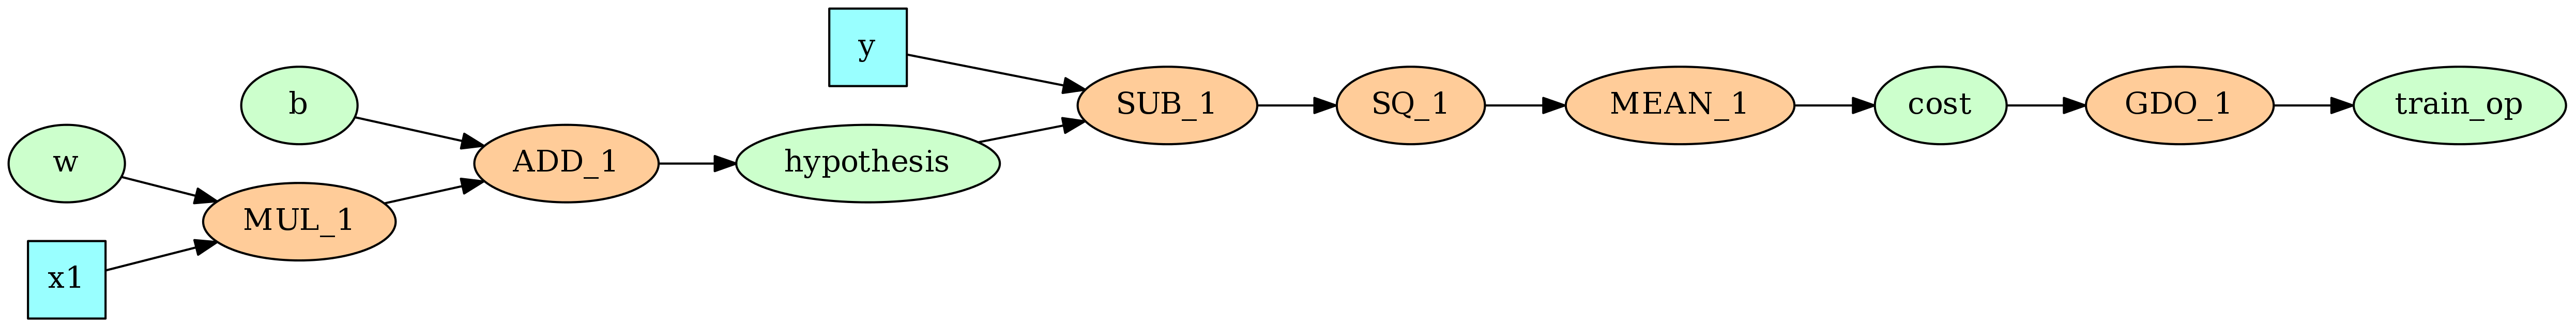

In [40]:
import networkx as nx
from nxpd import draw, nxpdParams
nxpdParams['show'] = 'ipynb'

G = nx.DiGraph()
G.graph['rankdir'] = 'LR'
G.graph['dpi'] = 300

G.add_node('x1', shape='square', style='filled', fillcolor='#99ffff')
G.add_node('y', shape='square', style='filled', fillcolor='#99ffff')
G.add_node('w', style='filled', fillcolor='#ccffcc')
G.add_node('b', style='filled', fillcolor='#ccffcc')
G.add_node('hypothesis', style='filled', fillcolor='#ccffcc')
G.add_node('cost', style='filled', fillcolor='#ccffcc')
G.add_node('train_op', style='filled', fillcolor='#ccffcc')
G.add_node('MUL_1', style='filled', fillcolor='#ffcc99')
G.add_node('ADD_1', style='filled', fillcolor='#ffcc99')
G.add_node('SUB_1', style='filled', fillcolor='#ffcc99')
G.add_node('SQ_1', style='filled', fillcolor='#ffcc99')
G.add_node('MEAN_1', style='filled', fillcolor='#ffcc99')
G.add_node('GDO_1', style='filled', fillcolor='#ffcc99')
G.add_edge('x1','MUL_1')
G.add_edge('w','MUL_1')
G.add_edge('MUL_1','ADD_1')
G.add_edge('b','ADD_1')
G.add_edge('ADD_1','hypothesis')
G.add_edge('hypothesis', 'SUB_1')
G.add_edge('y', 'SUB_1')
G.add_edge('SUB_1', 'SQ_1')
G.add_edge('SQ_1', 'MEAN_1')
G.add_edge('MEAN_1', 'cost')
G.add_edge('cost', 'GDO_1')
G.add_edge('GDO_1', 'train_op')
draw(G)

### 4.6. Tensorflow Implementation (Objective function and optimizer)
```python
# 손실 함수를 작성합니다.
# mean((h - Y)^2) : 예측값과 실제값의 거리를 비용(손실) 함수로 정합니다.
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# 텐서플로우에 기본적으로 포함되어 있는 함수를 이용해 경사 하강법 최적화를 수행합니다.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

# 비용을 최소화 하는 것이 최종 목표
train_op = optimizer.minimize(cost)
```

## 5. 실험 수행

### 5.1. Experiment for machine learning

데이터셋도 만들고, 모델도 만들어봤습니다. 이제 남은것은 바로 실험입니다. 실험의 주된 과정은 아래와 같습니다.
1. 구성된 모델에 데이터 셋의 샘플을 하나씩 넣어본다. $(x_{i1}, y_i)$를 모델 그래프에 투입!
1. 그래프에 표현된 모델을 통해 예측을 하고, 예측 결과 $\hat{y_i}$와 종속변수 $y_i$와 비교해본다. 
1. 얼마나 틀렸는지 수치로 표현하고, 이를 모델에게 알려주고 모델을 수정한다. 
1. 원하는 만큼 1번부터 3번까지의 과정을 반복한다. 

위 과정을 마치면 모델은 마련된 데이터셋의 샘플을 충분히, 반복적으로 보고 모델을 수정한다.
최종 결과로는 가장 오차가 적은 모델이 완성된다. (데이터셋이 좋고 모델을 적절히 잘 만들었다는 가정하에..)

### 5.2. Tensorflow Implementation (Experiement for machine learning)

위애서 설명한 실험 과정을 Tensorflow에서는 session을 만들어서 그래프와 데이터를 집어넣고 실행 시키는 과정을 통해 수행됩니다. 과정은 아래와 같습니다.

1. Session 생성
1. Session에서 사용할 그래프 설정 및 초기화
1. Session 실행 (반복적으로 데이터를 넣어주고, 결과 확인)
1. Session 종료

코드로 작성하면 아래와 같이 작성 가능합니다.

```python
# 세션을 생성하고 초기화합니다.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # 최적화를 100번 수행합니다.
    for step in range(100):
        # sess.run 을 통해 train_op 와 cost 그래프를 계산합니다.
        # 이 때, 가설 수식에 넣어야 할 실제값을 feed_dict 을 통해 전달합니다.
        _, cost_val = sess.run([train_op, cost], feed_dict={x1: x1_data, y: y_data})

        print(step, cost_val, sess.run(w), sess.run(b))
```

각 부분을 하나씩 살펴보면 아래와 같이 설명할 수 있습니다.

**1. Session 생성**

: scope내에서만 동작할 수 있도록 세션을 생성한다. ```sess = tf.Session(graph=graph)```과 같이 사용되지만 그래프에 대해 선언한적이 없다면 자동으로 모든 변수들은 default_graph에 작성된다. 이후 Session을 생성할 때도 사용할 graph를 명시하지 않는다면 default_graph를 묵시적으로 사용한다. 

**2. Session에서 사용할 그래프 설정 및 초기화 ```sess.run(tf.global_variables_initializer())```**

: session에서 전역변수를 초기화합니다. 위 구문은 자동으로 아래와 같은 역할을 합니다. 
```
tf.variable_initializer(global_variables())
``` 

이는 그래프에 있는 모든 변수를 다 가져오고, 각 변수별로 정의된 초기화 구문에 따라 동작합니다. 

**3. Session 실행 (반복적으로 데이터를 넣어주고, 결과 확인)**

: for loop를 이용해 여러번 수행함을 명시함.

```
sess.run([train_op, cost], feed_dict={X: x_data, Y: y_data})
``` 

위 명령을 통해 train_op과 cost를 그래프에서 계산한다. 계산을 위해 필요한 값은 데이터 셋이므로, feed_dict를 통해 그래프에서 정의된 placeholder인 x1, y에 데이터를 계속 넣어줄 자료를 작성해줍니다. 

- cost 계산: 정해진 데이터셋에서 한 샘플씩 불러와서 cost를 계산.
- train_op 계산: cost로 부터 error를 계산 후, 모델에 대한 편미분을 자동으로 계산해주는 과정을 이용하여 모델 W, b를 수정.

**4. Session 종료**

: sess.Close()를 통해 할당된 GPU 혹은 CPU 연산 자원 반환 및 session 종료.



> **Q) session 선언의 방법과 차이점은? 어떤게 효율적일까? 더 좋은 방법은 없을까?**
> ```python 
# case 1
sess = tf.Session()
# case 2
with tf.Session() as sess:
```

> A) case 1과 같은 방법은 따로 sess.close()를 해줘야합니다. 하지 않는다면 사용하는 GPU가 계속 점유된 채로 있기 때문에 문제가 됩니다. 
case 2와 같은 방법은 with를 이용해서 scope를 조절하기 때문에 scope가 끝나면 자동으로 세션이 종료됩니다. 가끔 case 2와 같이 선언하고 쓰다가 with 이후 scope에서 session을 다시 접근해서 사용하고자 할 때, 이미 닫혀있는 세션이라고 오류가 뜨는걸 경험하셨을겁니다.. 


> **Q) tf.Session과 tf.InteractiveSession의 차이점은?**

> **Q) 그래프에서 선언된 값을 Session 실행 도중에 확인해보려면?**

> A) print()를 통해 확인 가능하다. 변수를 그냥 출력하면 해당 tensor의 형태만 나온다. 내용을 보기 위해서는 sess.run을 통해 세션을 실행시키면서 확인해볼 변수명을 넣어준다. 다만 주의할 점은, 그냥 변수명만 넣어서 sess.run()을 해야한다. 만약 데이터셋을 전달해주는 동작을 추가한다면 데이터셋을 보고 모델이 업데이트되버린다. (주의할것)


> **Q) tf.Graph를 session안에서 만들면 어떻게 될까?**



## 5.3. Example code

```python
# Source code is based on golbin's tutorial repo.
# Link: https://github.com/golbin/TensorFlow-Tutorials/blob/master/01%20-%20TensorFlow%20Basic/03%20-%20Linear%20Regression.py

# X 와 Y 의 상관관계를 분석하는 기초적인 선형 회귀 모델을 만들고 실행해봅니다.
import tensorflow as tf

x_data = [1, 2, 3]
y_data = [1, 2, 3]

# name: 나중에 텐서보드등으로 값의 변화를 추적하거나 살펴보기 쉽게 하기 위해 이름을 붙여줍니다.
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

# 
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='w')
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='b')

# X 와 Y 의 상관 관계를 분석하기 위한 가설 수식을 작성합니다.
# y = W * x + b
# W 와 X 가 행렬이 아니므로 tf.matmul 이 아니라 기본 곱셈 기호를 사용했습니다.
hypothesis = X * W + b

# 손실 함수를 작성합니다.
# mean(h - Y)^2 : 예측값과 실제값의 거리를 비용(손실) 함수로 정합니다.
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# 텐서플로우에 기본적으로 포함되어 있는 함수를 이용해 경사 하강법 최적화를 수행합니다.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
# 비용을 최소화 하는 것이 최종 목표
train_op = optimizer.minimize(cost)

# 세션을 생성하고 초기화합니다.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # 최적화를 100번 수행합니다.
    for step in range(100):
        # sess.run 을 통해 train_op 와 cost 그래프를 계산합니다.
        # 이 때, 가설 수식에 넣어야 할 실제값을 feed_dict 을 통해 전달합니다.
        _, cost_val = sess.run([train_op, cost], feed_dict={X: x_data, Y: y_data})

        print(step, cost_val, sess.run(W), sess.run(b))

    # 최적화가 완료된 모델에 테스트 값을 넣고 결과가 잘 나오는지 확인해봅니다.
    print("\n=== Test ===")
    print("X: 5, Y:", sess.run(hypothesis, feed_dict={X: 5}))
    print("X: 2.5, Y:", sess.run(hypothesis, feed_dict={X: 2.5}))
```

## 다음에 알아볼 것들.

- 데이터가 복잡한 모양일 경우 (shape을 짚고 넘어가기)
- 데이터 효과적인 전달법 (placeholder, queue, reader, HDF5, TFRecord, protobuf등등)
- 데이터 샘플 자체의 크기가 매우 클 경우
- 데이터 샘플이 너무 적거나, 균형이 맞지 않는 경우
- 더 복잡한 모델이 필요
- 모델의 특정 요소를 새로 구현
- 여러 모델을 만들어 비교
- 같은 모델의 여러 버전을 만들어서 앙상블하기
- 여러 모델을 앙상블 하기
- 특정 GPU로 설정해서 실험
- 한 장비에서 여러 GPU로 실험
- 여러 장비에서 실험 (ClusterSpec)
- 동기화/비동기화 학습 방법
- 실험이 잘되고 있는지 확인
- 실험 잘하기 (데이터셋, 모델, 하이퍼파라미터별 실험나누기)
- 중간 결과를 눈으로 확인 (tensorboard 탭 활용하기)
- 데이터셋 관리하기
- 중간중간 디버깅 하기
- 테스트 모듈 집어넣기
- 여러 버전의 python에 대해 코드 확인
- 여러 버전의 tensorflow에 대해서 동작 확인
- hyperparameter를 따로 관리해서 튜닝하고 싶은 경우
- 이전에 학습시켜논 모델을 활용하는 법
- 모델 그래프 이쁘게 그려보기
- 모델 하나 만들고 클라우드에서 gpu 수백개로 실험하기
- 학습결과 저장하기 
- 저장된 학습결과를 다른 환경에서 사용하기
- 스케쥴링으로 일시키기
- 딥러닝 모델외에 일반적인 머신러닝 모델 구현하기
- Keras, tf.slim과 섞어쓰기
- 모듈 단위 나누기
- 다른 고수님들이 알려주시는 꿀팁들 소개
- Inference 데모 만들기 (멋지게는 아니고..)

등등등.. 생각날때마다 업데이트. 추가 문의도 받습니다. (설치는 다루지 않습니다.. 설치에 대한 문의가 실제로 상당히 많지만 가이드 읽고 직접해보세요..허허..)